# Alpha Vantage API - Technical Indicators
______________________

## Collecting information for a stock/ETF technical analysis using Alpha Vantage API

In [135]:
# Import libraries
import os
import json
import pandas as pd
import requests
import matplotlib.pyplot as plt
from dotenv import load_dotenv
load_dotenv()

%matplotlib inline

In [201]:
# Read in the API Key (obtained at https://www.alphavantage.co/documentation/) 
apikey = os.getenv('ALPHA_VANTAGE_KEY')
ticker = 'NVDA'

# Company Overview

In [202]:
# Company overview
company_overview = f"https://www.alphavantage.co/query?function=OVERVIEW&symbol={ticker}&apikey={apikey}"
response_data = requests.get(company_overview).json()
response_data

{'Symbol': 'NVDA',
 'AssetType': 'Common Stock',
 'Name': 'NVIDIA Corporation',
 'Description': "NVIDIA Corporation operates as a visual computing company worldwide. It operates in two segments, Graphics and Compute & Networking. The Graphics segment offers GeForce GPUs for gaming and PCs, the GeForce NOW game streaming service and related infrastructure, and solutions for gaming platforms; Quadro/NVIDIA RTX GPUs for enterprise design; GRID software for cloud-based visual and virtual computing; and automotive platforms for infotainment systems. The Compute & Networking segment offers Data Center platforms and systems for AI, HPC, and accelerated computing; Mellanox networking and interconnect solutions; automotive AI Cockpit, autonomous driving development agreements, and autonomous vehicle solutions; and Jetson for robotics and other embedded platforms. The company's products are used in gaming, professional visualization, datacenter, and automotive markets. NVIDIA Corporation sells i

In [221]:
# Collect daily close price history
daily_prices = f"https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol={ticker}&outputsize=full&apikey={apikey}"
response_data = requests.get(daily_prices).json()
response_data.keys()

dict_keys(['Meta Data', 'Time Series (Daily)'])

In [222]:
daily_prices = response_data['Time Series (Daily)']
# Create dataframe from json type response
daily_prices_df = pd.DataFrame(daily_prices)
# Transform dataframe 
daily_prices_df = daily_prices_df.T
# Convert data from object type to float type 
daily_prices_df = daily_prices_df.astype('float').iloc[:252]
daily_prices_df = daily_prices_df["4. close"]
daily_prices_df

2021-04-09    576.00
2021-04-08    572.68
2021-04-07    565.74
2021-04-06    554.46
2021-04-05    559.50
               ...  
2020-04-16    294.70
2020-04-15    280.84
2020-04-14    283.95
2020-04-13    269.85
2020-04-09    262.95
Name: 4. close, Length: 252, dtype: float64

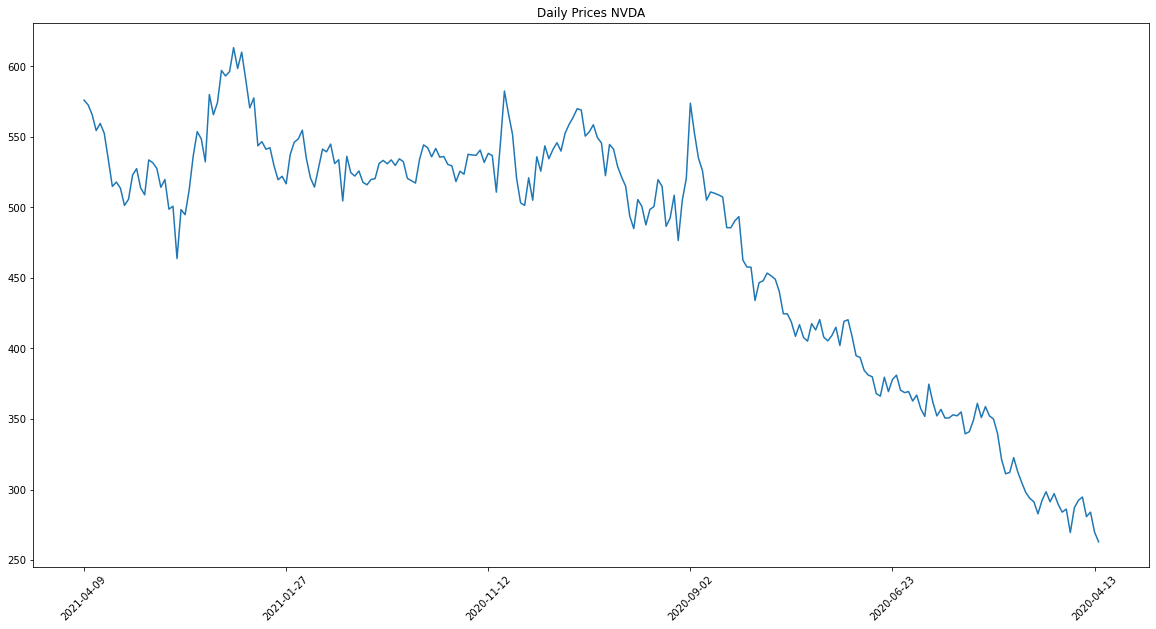

In [205]:
# Plot daily prices
daily_prices_plot = daily_prices_df.plot(figsize=(20,10), title=f"Daily Prices {ticker}", rot=45)

# EMA - Exponential Moving Average

In [206]:
# Customize url to obtain EMA (exponential moving average) data
interval = 'daily'
time_period = '30'

ema = f"https://www.alphavantage.co/query?function=EMA&symbol={ticker}&interval={interval}&time_period={time_period}&series_type=close&apikey={apikey}"

response_data = requests.get(ema).json()
response_data.keys()

dict_keys(['Meta Data', 'Technical Analysis: EMA'])

In [207]:
ema = response_data['Technical Analysis: EMA']
# Create dataframe from json type response
ema_df = pd.DataFrame(ema)
# Transform dataframe 
ema_df = ema_df.T
# Convert data from object type to float type 
ema_df = ema_df.astype('float').iloc[:252]
ema_df

,EMA
2021-04-09,538.3952
2021-04-08,535.8018
2021-04-07,533.2584
2021-04-06,531.0183
2021-04-05,529.4017
...,...
2020-04-16,258.2335
2020-04-15,255.7462
2020-04-14,254.0420
2020-04-13,252.0061


In [226]:
combined_ema_prices = pd.concat([ema_df, daily_prices_df],join='inner',axis=1)
combined_ema_prices.rename(columns={'4. close':'Daily Close'}, inplace=True)
combined_ema_prices

,EMA,Daily Close
2021-04-09,538.3952,576.00
2021-04-08,535.8018,572.68
2021-04-07,533.2584,565.74
2021-04-06,531.0183,554.46
2021-04-05,529.4017,559.50
...,...,...
2020-04-16,258.2335,294.70
2020-04-15,255.7462,280.84
2020-04-14,254.0420,283.95
2020-04-13,252.0061,269.85


<AxesSubplot:title={'center':'EMA NVDA'}, ylabel='Price ($)'>

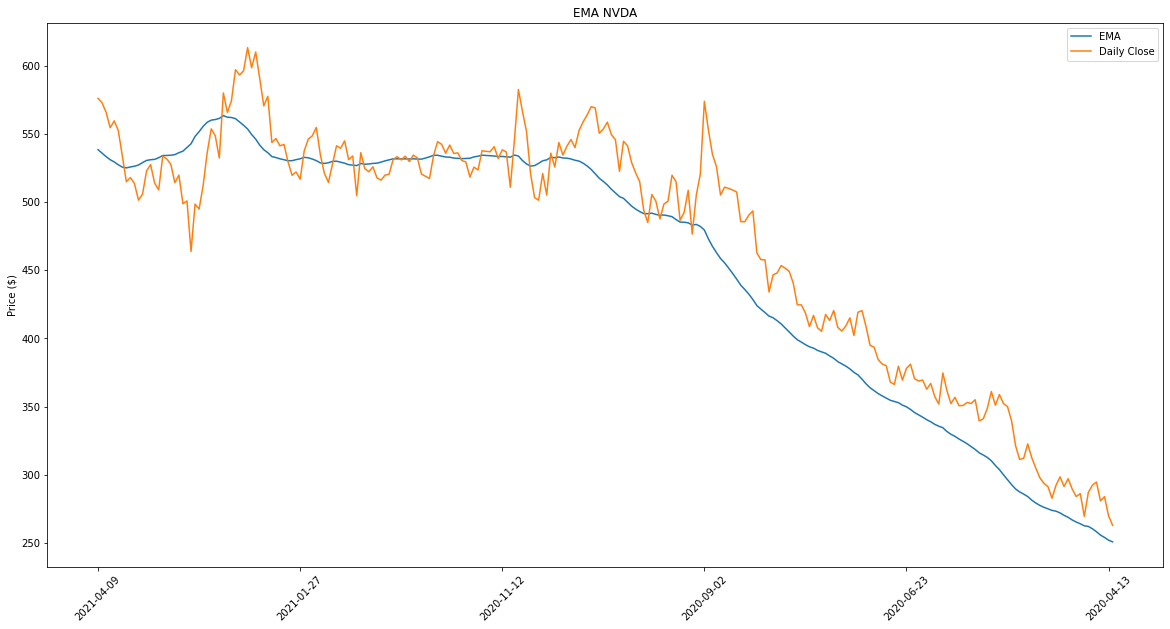

In [229]:
# Plot EMA and daily close
combined_ema_prices_plot = combined_ema_prices.plot(figsize=(20,10), ylabel='Price ($)', title=f'EMA {ticker}', rot=45)
combined_ema_prices_plot

# MACD - Moving Average Convergence Divergence

In [209]:
# Customize the URL to create MACD request. Input time interval
interval = 'daily'

macd = f"https://www.alphavantage.co/query?function=MACD&symbol={ticker}&interval={interval}&series_type=close&apikey={apikey}"

response_data = requests.get(macd).json()
response_data.keys()

dict_keys(['Meta Data', 'Technical Analysis: MACD'])

In [210]:
macd = response_data['Technical Analysis: MACD']
# Create dataframe from json type response
macd_df = pd.DataFrame(macd)
# Transform dataframe 
macd_df = macd_df.T
# Convert data from object type to float type 
macd_df = macd_df.astype('float').iloc[:252]
macd_df.tail()

,MACD_Signal,MACD,MACD_Hist
2020-04-16,4.4677,9.3227,4.8549
2020-04-15,3.2540,7.4630,4.2089
2020-04-14,2.2018,6.3900,4.1883
2020-04-13,1.1547,4.6114,3.4567
2020-04-09,0.2905,3.7079,3.4173


<AxesSubplot:title={'center':'MACD NVDA'}>

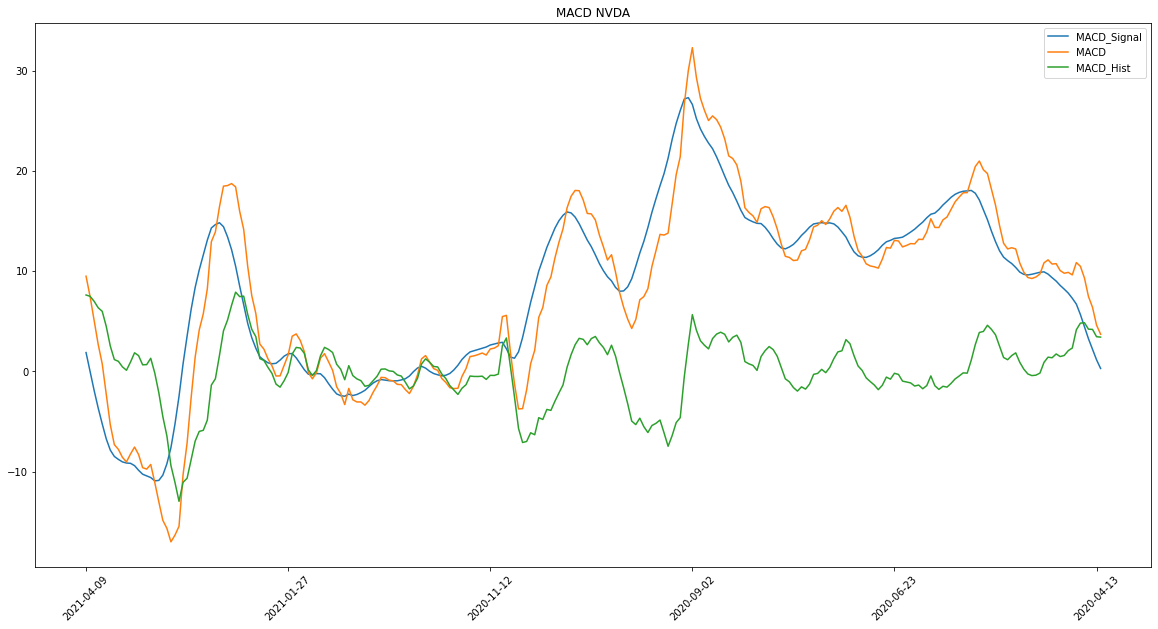

In [211]:
# Plot MACD and select number of datapoints to be plotted
macd_plot = macd_df.plot(figsize=(20,10), title=f'MACD {ticker}', rot=45)
macd_plot

In [147]:
# MACD crossing above zero is considered bullish, while crossing below zero is bearish. Secondly, when MACD turns up from below zero it is considered bullish. When it turns down from above zero it is considered bearish.
# Source: https://www.fidelity.com/learning-center/trading-investing/technical-analysis/technical-indicator-guide/macd

# Bollinger Bands

In [236]:
# Create url request for Bollinger Bands and select time period
interval = 'daily'
time_period = "30"

bbands = f"https://www.alphavantage.co/query?function=BBANDS&symbol={ticker}&interval={interval}&time_period={time_period}&series_type=close&apikey={apikey}" 

response_data = requests.get(bbands).json() 
response_data.keys()

dict_keys(['Meta Data', 'Technical Analysis: BBANDS'])

In [237]:
bbands = response_data['Technical Analysis: BBANDS']
# Create dataframe from json type response
bbands_df = pd.DataFrame(bbands)
# Tranform datatframe
bbands_df = bbands_df.T
# Convert data from object type to float type 
bbands_df = bbands_df.astype('float').iloc[:252]

In [238]:
# Add daily close price column to create a plot
combined_bbands = pd.concat([bbands_df,daily_prices_df], join='inner', axis=1)
combined_bbands.dropna(inplace=True)
combined_bbands.rename(columns={'4. close':'Daily Close'}, inplace=True)
combined_bbands

,Real Lower Band,Real Middle Band,Real Upper Band,Daily Close
2021-04-09,474.6701,525.8099,576.9497,576.00
2021-04-08,476.6383,524.3476,572.0569,572.68
2021-04-07,475.8593,524.5841,573.3089,565.74
2021-04-06,475.8783,524.5761,573.2739,554.46
2021-04-05,474.4647,525.2289,575.9932,559.50
...,...,...,...,...
2020-04-16,198.0690,248.3428,298.6166,294.70
2020-04-15,198.8498,248.0036,297.1574,280.84
2020-04-14,199.3851,247.5060,295.6268,283.95
2020-04-13,199.8143,247.2556,294.6970,269.85


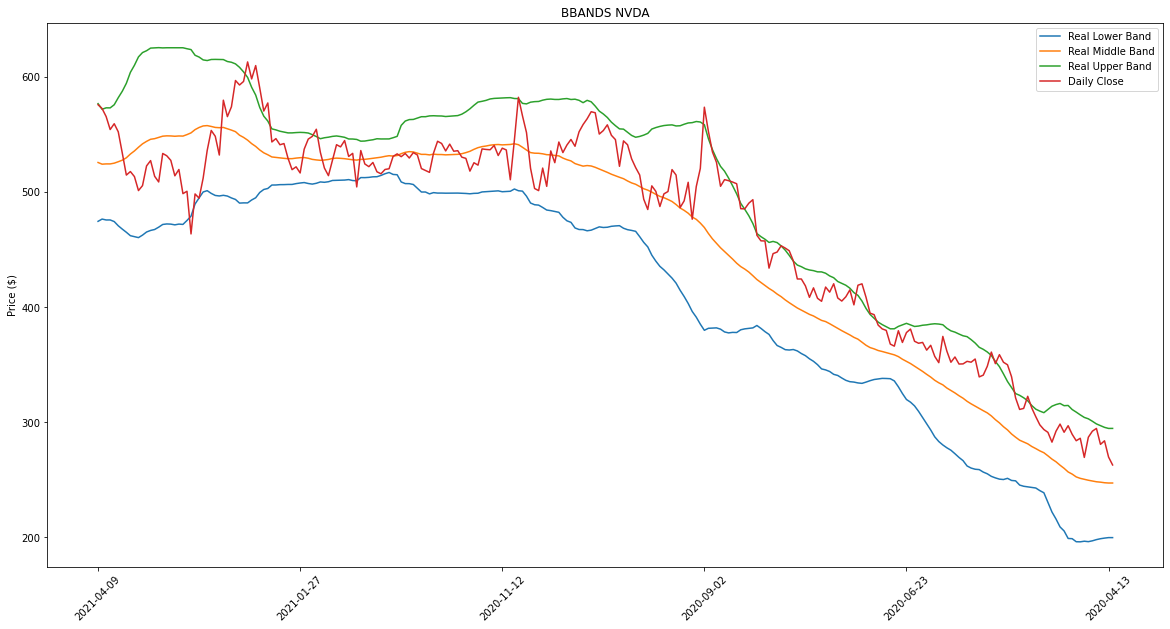

In [239]:
# Plot Bollinger Bands
combined_bbands_plot = combined_bbands.plot(figsize=(20,10), ylabel="Price ($)", title=f'BBANDS {ticker}', rot=45)

In [152]:
# When stock prices continually touch the upper Bollinger Band, the prices are thought to be overbought; conversely, when they continually touch the lower band, prices are thought to be oversold, triggering a buy signal.
# Source: https://www.investopedia.com/articles/technical/102201.asp 

# RSI - Relative Strength Index

In [216]:
# Customize url to obtain RSI data. Input desired interval and time period
interval = 'daily'
time_period = '30'

rsi = f"https://www.alphavantage.co/query?function=RSI&symbol={ticker}&interval={interval}&time_period={time_period}&series_type=close&apikey={apikey}"

response_data = requests.get(rsi).json() 
response_data.keys()

dict_keys(['Meta Data', 'Technical Analysis: RSI'])

In [217]:
rsi = response_data['Technical Analysis: RSI']
# Create dataframe from json type response
rsi_df = pd.DataFrame(rsi)
# Tranform datatframe
rsi_df = rsi_df.T
# Convert data from object type to float type 
rsi_df = rsi_df.astype('float').iloc[:252]
rsi_df

,RSI
2021-04-09,55.9021
2021-04-08,55.4717
2021-04-07,54.5757
2021-04-06,53.0927
2021-04-05,53.8521
...,...
2020-04-16,56.6119
2020-04-15,54.7075
2020-04-14,55.2334
2020-04-13,53.2646


<AxesSubplot:title={'center':'RSI NVDA'}>

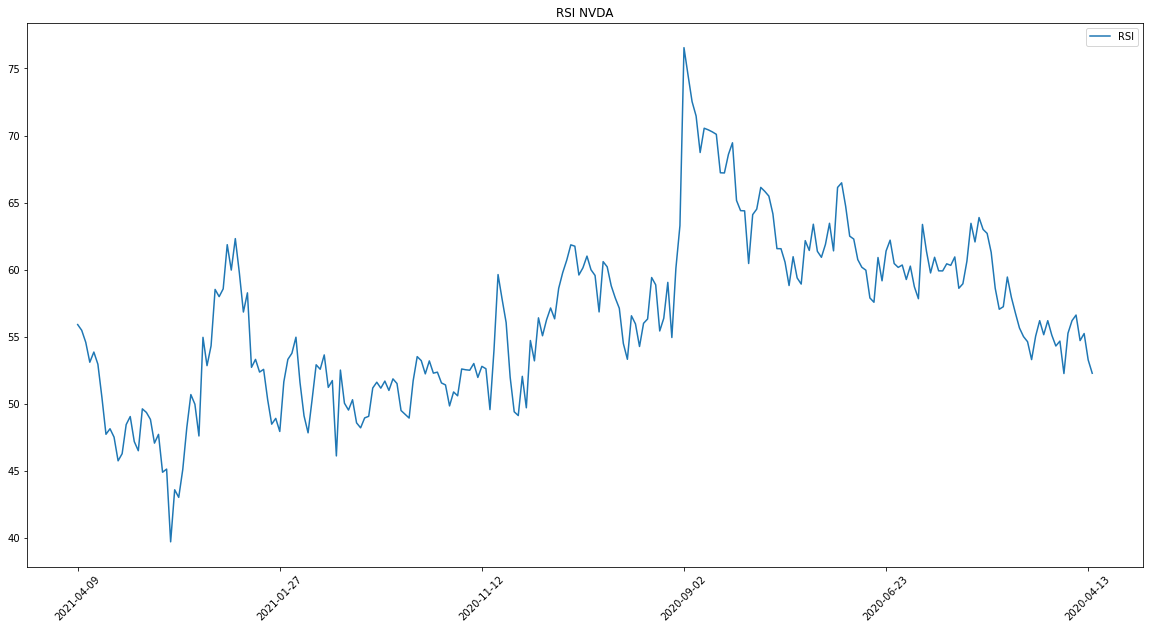

In [218]:
rsi_df.plot(figsize=(20,10),title=f"RSI {ticker}", rot=45)

In [ ]:
# Traditional interpretation and usage of the RSI dictates that values of 70 or above suggest that a security is becoming overbought or overvalued and may be primed for a trend reversal or corrective price pullback. An RSI reading of 30 or below indicates an oversold or undervalued condition. 
# Source: https://www.investopedia.com/articles/active-trading/042114/overbought-or-oversold-use-relative-strength-index-find-out.asp